In [20]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [21]:
env = BlackjackEnv()

In [22]:
def generate_sequence(policy):
    Episode=[]
    notEndOfEpisode=True
    S=env.reset()
    while notEndOfEpisode:
        A=policy(S)
        S_next, R, Criteria, _ = env.step(A)
        Episode.append((S,A,R))
        if notEndOfEpisode==Criteria:
            notEndOfEpisode=False
        S=S_next
    return Episode

In [98]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # loop over all episodes
    for j in range(0,num_episodes):
        
        #generate sequence for episode
        sequence=generate_sequence(policy)
        
        Unique_states = set([x[0] for x in sequence])
        for state in Unique_states:
            # first visit of state S in sequence
            first_visit,i=0,0
            for x in enumerate(sequence):
                if x[0]==state:
                    first_visit=i
                i+=1
                
            #Sum of discounted returns
            G=[]
            i=1
            for x in enumerate(sequence[first_visit:]):
                G.append(x[1][2]*(discount_factor**i))
                i+=1
            G = sum(G)
            
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]


    return V

In [99]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

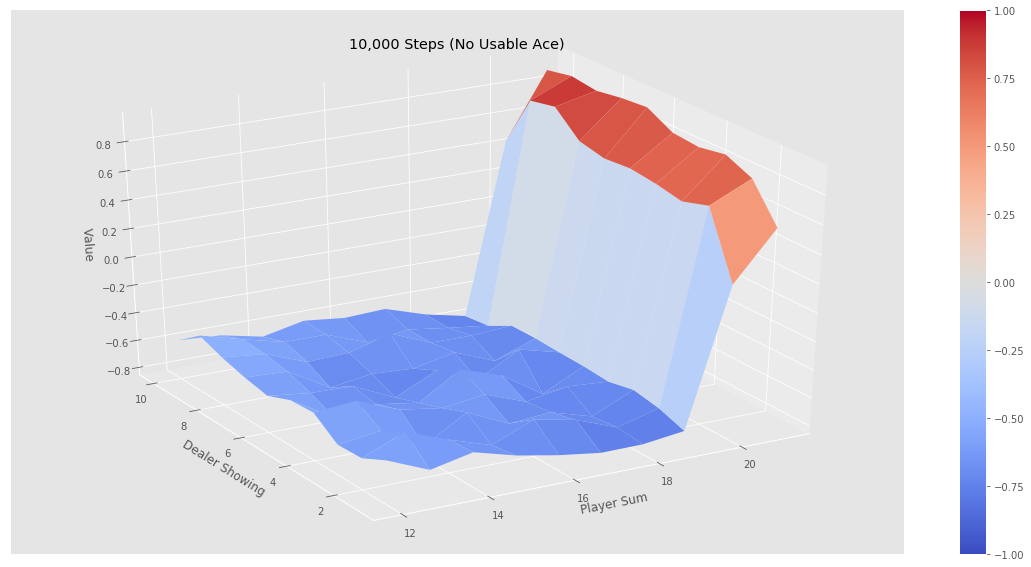

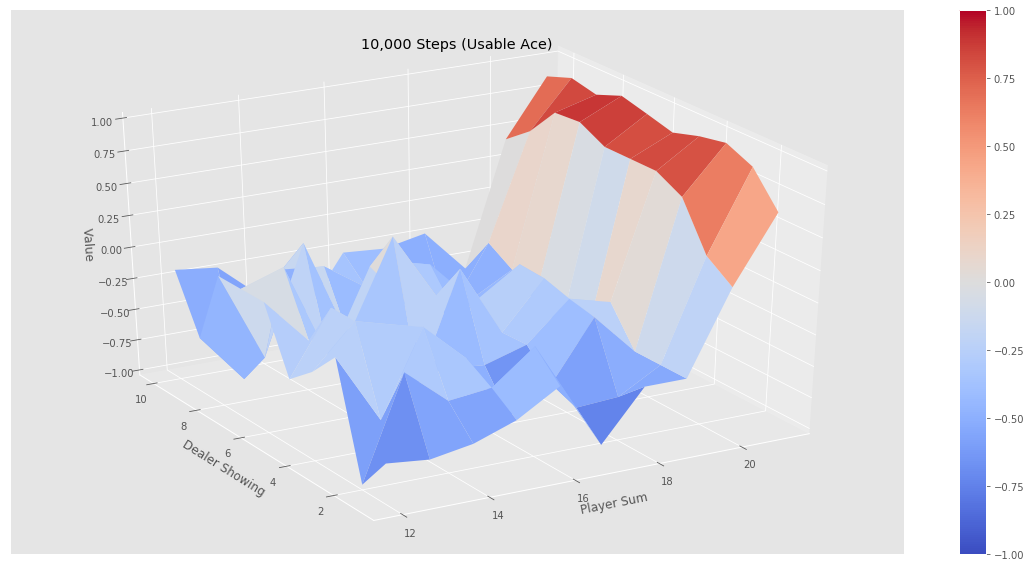

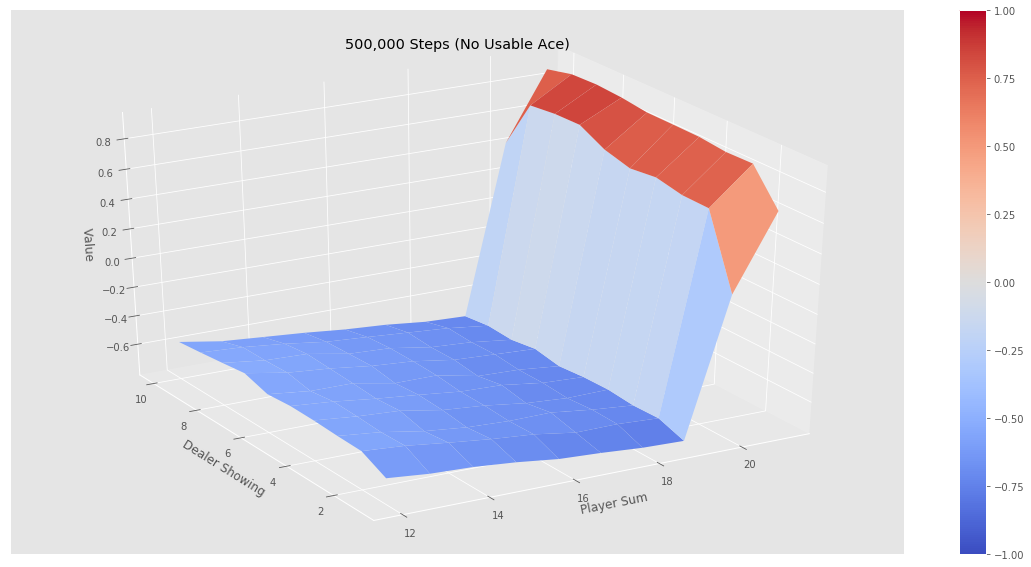

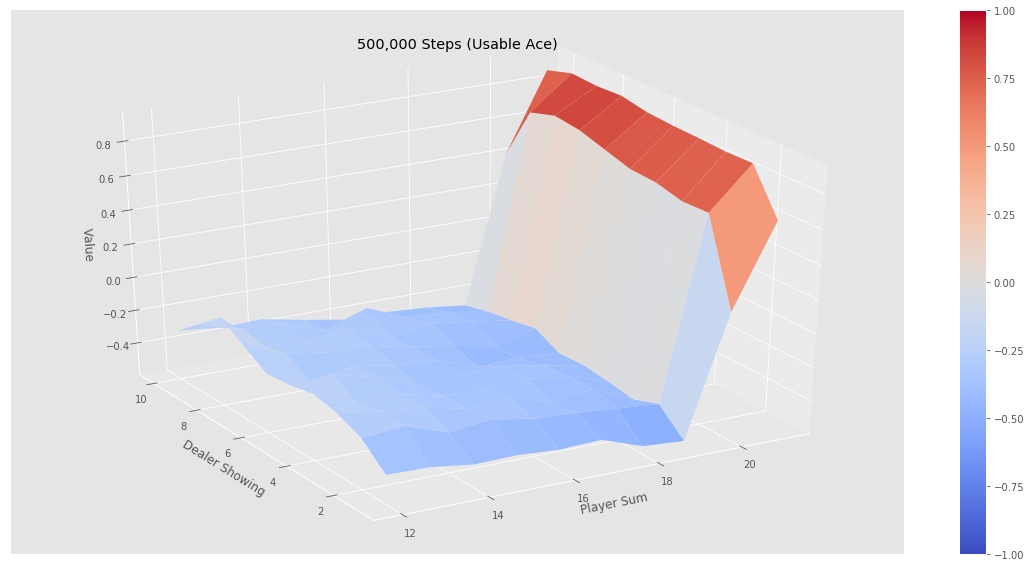

In [100]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")